(4, 150)
(150,)


<ipython-input-1-4bd3e63b3a7f>:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(uu,vv,y_new > 0, cmap=cmap_region, vmin = 0.0, vmax = 1.0)


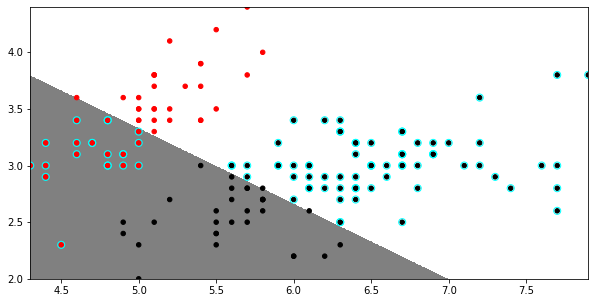

In [1]:
from sklearn.datasets import load_iris
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

iris = load_iris()
x = iris.data.T
y = iris.target # 정답
D,N = x.shape

print(x.shape)
print(y.shape)

x1 = x[0,:] # input value 중에서 1개 
x2 = x[1,:] # input value 중에서 1개  4개의 input 중에서 그냥 2개만 사용

y[np.where(y != 0)] = -1 # sample: black, region: grey
y[np.where(y == 0)] = +1 # sample: red, region: white

res = 1000
x1_new = (np.linspace(np.min(x1),np.max(x1),res))
x2_new = (np.linspace(np.min(x2),np.max(x2),res))

[uu,vv] = np.meshgrid(x1_new, x2_new)

cmap_sample = matplotlib.colors.ListedColormap(['black', 'red'])
cmap_region = matplotlib.colors.ListedColormap(['gray', 'white'])

# w = np.random.randn(3)
w = np.array([-10, 1.0, 1.5])
 
y_new = w[0] + w[1]*uu + w[2]*vv
y_predict = (w[0] + w[1]*x1 + w[2]*x2)

id_misclass = np.where(y_predict*y < 0)
id_misclass = np.random.permutation(id_misclass[0])

plt.figure(figsize = (10,5))
plt.pcolormesh(uu,vv,y_new > 0, cmap=cmap_region, vmin = 0.0, vmax = 1.0)
plt.scatter(x1,x2, c = y, s = 20, cmap = cmap_sample, vmin = -1, vmax = +1)
plt.scatter(x1[id_misclass],x2[id_misclass], s = 50, marker = 'o', facecolor = 'none', edgecolor = 'cyan')

<ipython-input-2-87c2f4f32f3d>:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(uu,vv,y_new > 0, cmap=cmap_region, vmin = 0.0, vmax = 1.0)


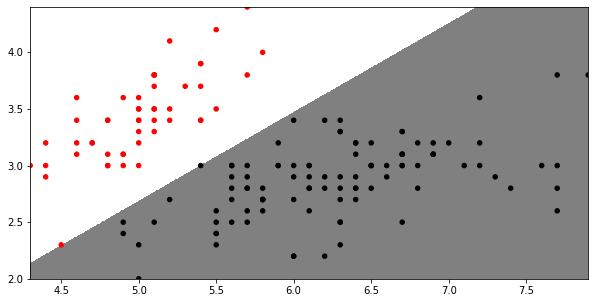

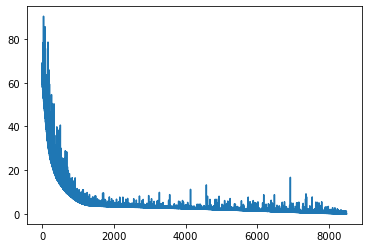

In [2]:
eta = 0.01
maxIter = 10000

cost = np.zeros(maxIter)
cost[:] = np.nan

id_misclass = np.where(y_predict*y < 0)
id_misclass = np.random.permutation(id_misclass[0])

for iter in range(0,maxIter):
    w = w + eta*np.array([1, x1[id_misclass[0]], x2[id_misclass[0]]])*y[id_misclass[0]]
    
    y_predict = (w[0] + w[1]*x1 + w[2]*x2)
    
    id_misclass = np.where(y_predict*y < 0)[0]    
    
    cost[iter] = -np.sum(y_predict[id_misclass]*y[id_misclass])    
    id_misclass = np.random.permutation(id_misclass)
    
#     y_new = w[0] + w[1]*uu + w[2]*vv
#     plt.figure(figsize = (10,5))
#     plt.pcolormesh(uu,vv,y_new > 0, cmap=cmap_region, vmin = 0.0, vmax = 1.0)
#     plt.scatter(x1,x2, c = y, s = 20, cmap = cmap_sample, vmin = -1, vmax = +1)
#     plt.scatter(x1[id_misclass],x2[id_misclass], s = 50, marker = 'o', facecolor = 'none', edgecolor = 'cyan')
    
    if id_misclass.size == 0:
        break
    
y_new = w[0] + w[1]*uu + w[2]*vv

plt.figure(figsize = (10,5))
plt.pcolormesh(uu,vv,y_new > 0, cmap=cmap_region, vmin = 0.0, vmax = 1.0)
plt.scatter(x1,x2, c = y, s = 20, cmap = cmap_sample, vmin = -1, vmax = +1)
plt.scatter(x1[id_misclass],x2[id_misclass], s = 50, marker = 'o', facecolor = 'none', edgecolor = 'cyan')

plt.figure()
plt.plot(cost)

<ipython-input-3-88189423fcb7>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(uu,vv,y_new > 0.5, cmap=cmap_region, vmin = 0.0, vmax = 1.0)


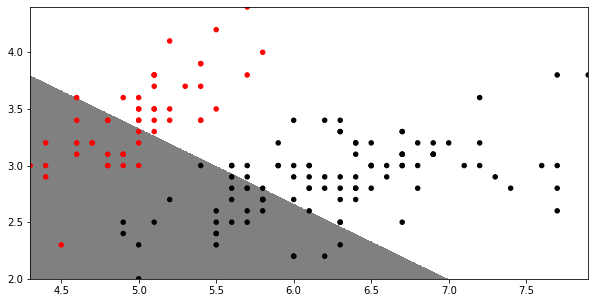

In [3]:
def sigmoid(x):
    return 1 / (1 +np.exp(-x))

t = y
t[np.where(t < 0)] = 0 # sample: black, region: grey
t[np.where(t > 0)] = +1 # sample: red, region: white

cmap_sample = matplotlib.colors.ListedColormap(['black', 'red'])
cmap_region = matplotlib.colors.ListedColormap(['gray', 'white'])

w = np.array([-10, 1.0, 1.5])
a_new = w[0] + w[1]*uu + w[2]*vv
y_new = sigmoid(a_new)

a_predict = (w[0] + w[1]*x1 + w[2]*x2)
y_predict = sigmoid(a_predict)

plt.figure(figsize = (10,5))
plt.pcolormesh(uu,vv,y_new > 0.5, cmap=cmap_region, vmin = 0.0, vmax = 1.0)
plt.scatter(x1,x2, c = t, s = 20, cmap = cmap_sample, vmin = 0, vmax = +1)

<ipython-input-4-69c61f71d8e5>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(uu,vv,y_new > 0.5, cmap=cmap_region, vmin = 0.0, vmax = 1.0)


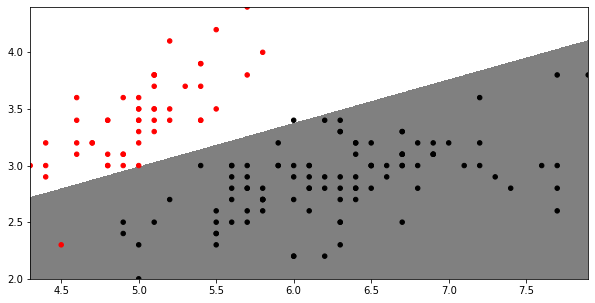

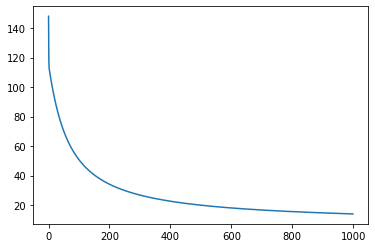

In [4]:
eta = 0.001
maxIter = 1000

cost = np.zeros(maxIter)
cost[:] = np.nan

for iter in range(0,maxIter):
    cost[iter] = -np.sum(t*np.log(y_predict) + (1 - t)*np.log(1 - y_predict))
    w = w - eta*np.sum((y_predict - t)*np.vstack([np.ones((1,N)), x1.reshape(1,-1), x2.reshape(1,-1)]), axis = 1)

    a_predict = (w[0] + w[1]*x1 + w[2]*x2)
    y_predict = sigmoid(a_predict)

#     a_new = w[0] + w[1]*uu + w[2]*vv
#     y_new = sigmoid(a_new)
#     plt.figure(figsize = (10,5))
#     plt.pcolormesh(uu,vv,y_new > 0.5, cmap=cmap_region, vmin = 0.0, vmax = 1.0)
#     plt.scatter(x1,x2, c = t, s = 20, cmap = cmap_sample, vmin = 0, vmax = +1)    
    
a_new = w[0] + w[1]*uu + w[2]*vv
y_new = sigmoid(a_new)

plt.figure(figsize = (10,5))
plt.pcolormesh(uu,vv,y_new > 0.5, cmap=cmap_region, vmin = 0.0, vmax = 1.0)
plt.scatter(x1,x2, c = t, s = 20, cmap = cmap_sample, vmin = 0, vmax = +1)
    
plt.figure()
plt.plot(cost)